# Perceptron
Notice `Linear` that happened to show in task

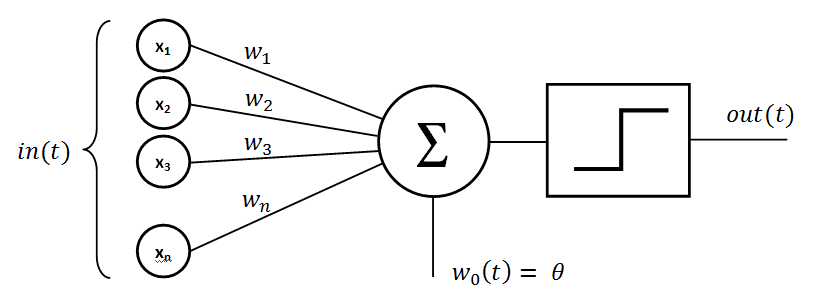

### Create a Perceptron (See task answer)

# Cicles Classification Problem

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

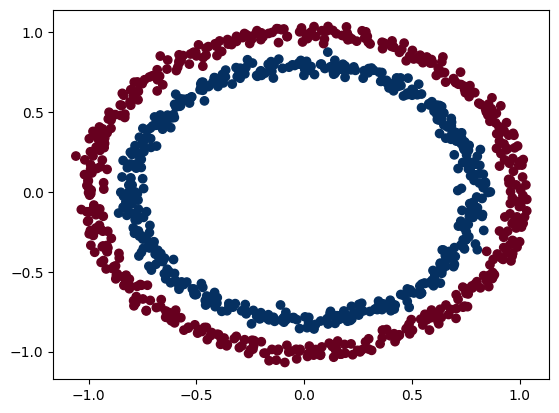

In [2]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [3]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


Train Shape: torch.Size([800, 2]) | Test Shape: torch.Size([200, 2])


In [4]:
print(f"Data Point: {X_train[0]}")

Data Point: tensor([0.8924, 0.4926])


# Activation Function

### Go [Here](https://playground.tensorflow.org/)

In [5]:
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return torch.squeeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))))

In [6]:
model: nn.Module = CircleModel()
print(model)

CircleModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [7]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
print(f"Model: {model.state_dict()}")

Model: OrderedDict([('fc1.weight', tensor([[-0.5032,  0.5628],
        [ 0.2159, -0.4285],
        [ 0.4337, -0.3308],
        [ 0.2613, -0.4794],
        [-0.5568,  0.2675],
        [ 0.4444,  0.6084],
        [ 0.1742, -0.6715],
        [-0.5740, -0.5096],
        [ 0.3321,  0.6002],
        [-0.0181, -0.5725]])), ('fc1.bias', tensor([ 0.5766, -0.0274,  0.0137, -0.3621, -0.0745,  0.2936, -0.4237, -0.5995,
         0.6140, -0.4008])), ('fc2.weight', tensor([[-0.1552,  0.1614, -0.2531, -0.0280,  0.1765,  0.2189,  0.2831,  0.0957,
         -0.0989,  0.1508],
        [ 0.1585,  0.3125, -0.2797,  0.0017,  0.2345,  0.0347,  0.0972, -0.2998,
          0.0163, -0.1594],
        [-0.1194,  0.0577,  0.1788, -0.2931, -0.0956,  0.0648, -0.0146, -0.2857,
         -0.2867, -0.2089],
        [-0.1745,  0.2011,  0.1052, -0.2025,  0.0072,  0.0696,  0.2381, -0.1051,
          0.1872, -0.1765],
        [-0.1429, -0.0219,  0.0594, -0.3038,  0.0230,  0.1983, -0.3083,  0.0509,
         -0.0733, -0.1592],


In [9]:
from helper_functions import plot_decision_boundary

def plot_boundaries(
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

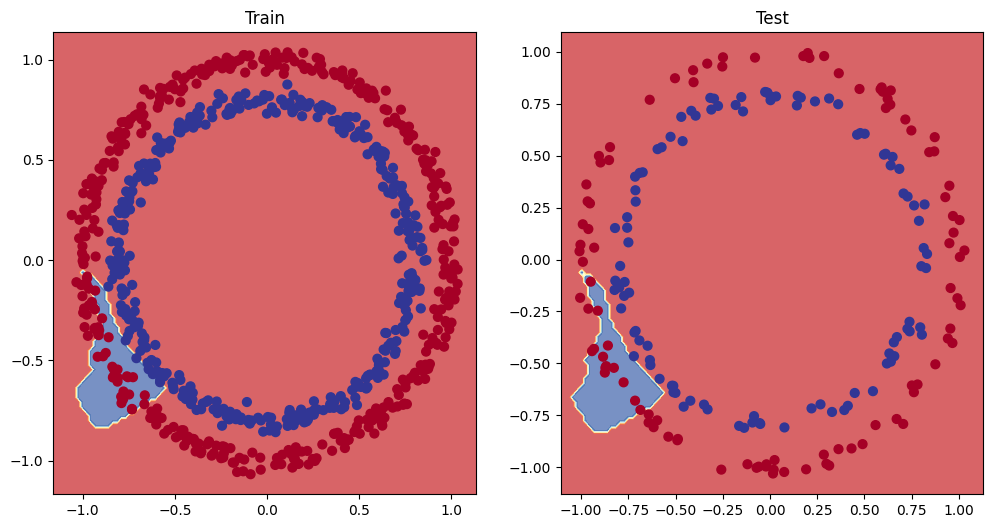

In [10]:
plot_boundaries(model)

In [11]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

Epoch 0: train loss 0.6924263834953308, test loss 0.6924253702163696
Epoch 10: train loss 0.6911318302154541, test loss 0.6909007430076599
Epoch 20: train loss 0.6900537014007568, test loss 0.6896378397941589
Epoch 30: train loss 0.6889582276344299, test loss 0.6885177493095398
Epoch 40: train loss 0.6877483129501343, test loss 0.6874045729637146
Epoch 50: train loss 0.6864168643951416, test loss 0.6861880421638489
Epoch 60: train loss 0.6849370002746582, test loss 0.6847732067108154
Epoch 70: train loss 0.6832973957061768, test loss 0.6831958293914795
Epoch 80: train loss 0.6814637780189514, test loss 0.6814302206039429
Epoch 90: train loss 0.6793874502182007, test loss 0.6794032454490662
Epoch 100: train loss 0.6770839691162109, test loss 0.6771739721298218
Epoch 110: train loss 0.6744972467422485, test loss 0.6746401786804199
Epoch 120: train loss 0.6715962886810303, test loss 0.6717692613601685
Epoch 130: train loss 0.6683540344238281, test loss 0.6684802174568176
Epoch 140: train 

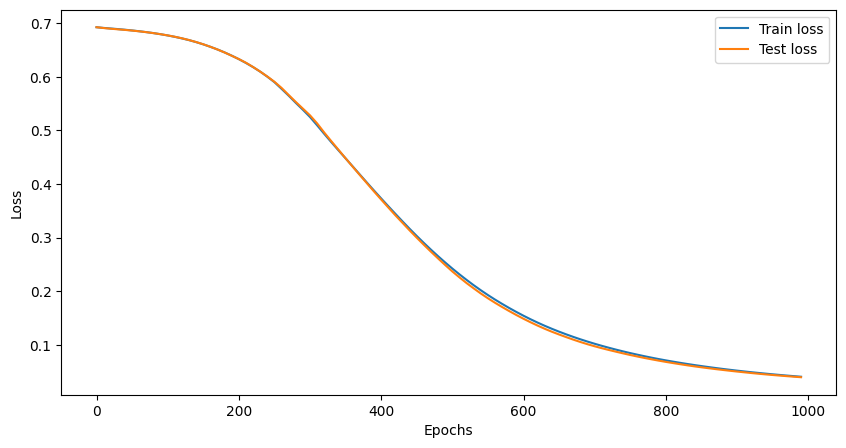

In [12]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)


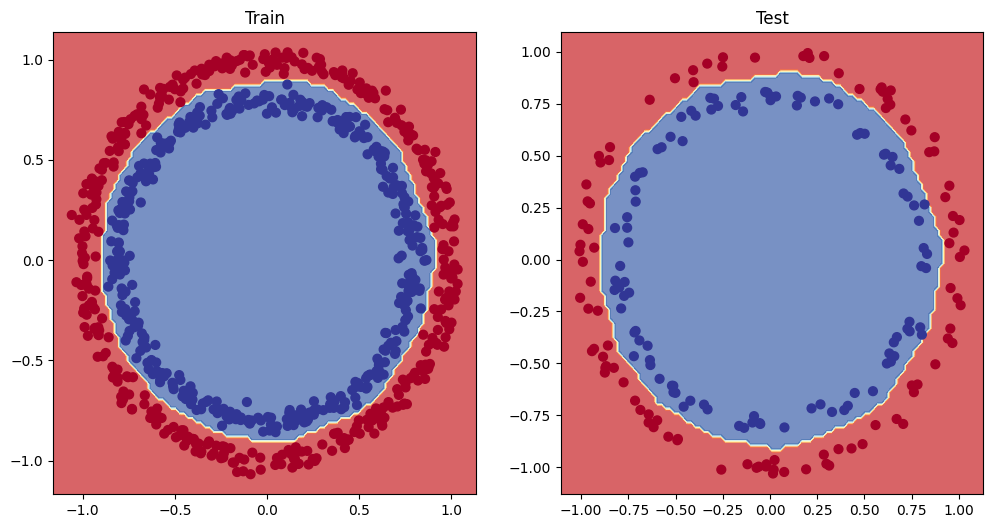

In [13]:
plot_boundaries(model)

In [14]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

accuracy(y_preds, y_test)

tensor(1.)

In [15]:
sample = torch.tensor([[0.7, 0.5]]) # put any sample. Note size of sample (number, 2)
with torch.inference_mode():
    y_pred = model(sample)
    y_pred = torch.sigmoid(y_pred)
    y_pred = torch.round(y_pred)


y_pred

tensor(1.)

# <font color="green">Blob Solver Exercise</font>

# <font color="green">MNist Solver Exercise</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.